# Eyring transition state theory

This notebook shows how to calculate reaction rate constants using Eyring transition state theory with the ``KineticsSandbox``. The following steps are needeed
- set up a system using the ``D1`` class in ``systems/systems``
- set up potential using the potential class ``Bolhuis`` from ``potentials/D1``
- calculate minima, transition state and Hessian at the transition state using methods by provided by the potential class
- calculate the Eyring TST rate constant and the high-temperature limit of the Eyring TST rate constant using the methods ``TST_D1``and ``TST_ht_D1`` provided by module ``utils/rate_theory``.

In [1]:
#-----------------------------------------
#   I M P O R T S 
#-----------------------------------------
import sys
sys.path.append("..")  

import matplotlib.pyplot as plt
import numpy as np

# local packages and modules
from system import system
from potential import D1
from utils import rate_theory
%matplotlib inline 

# The short version

Here is a minimal code block that shows you how to calculate rate constants for a one-dimensional Bolhuis potential. The extended version with lots of explanations follows below

In [2]:

#-----------------------------------------
#  T H E   A C T U A L  C O D E
#-----------------------------------------

# set discretization interval
h = 0.001

# initialize the system
system = system.D1(100, 0, 0, 300, 1, 0.001, h)

# initialize one-dimensional Bolhuis potential
param = [2, 2, 5, 1, 2, 0]
potential = D1.Bolhuis(param)

# caclulate start values for the minima 
min_1_start = potential.a - np.sqrt( potential.b )
min_2_start = potential.a + np.sqrt( potential.b )

# find minima 
min_1 = potential.min(min_1_start)
min_2 = potential.min(min_2_start)

# find transition state
TS = potential.TS( min_1, min_2)

# calculate the Eyring TST rates
k_AB = rate_theory.TST_D1(min_1, TS, system.T, system.m, h, potential)
k_BA = rate_theory.TST_D1(min_2, TS, system.T, system.m, h, potential)

# calculate the high-temperature approximation of the Eyring TST rates
k_AB_ht = rate_theory.TST_ht_D1(min_1, TS, system.T, system.m, h, potential)
k_BA_ht = rate_theory.TST_ht_D1(min_2, TS, system.T, system.m, h, potential)
    
# print result
print("k_AB: ", k_AB)
print("k_BA: ", k_BA)
print("k_AB, ht: ", k_AB_ht)
print("k_BA, ht: ", k_BA_ht)

del system, potential, param, min_1_start, min_2_start, min_1, min_2, TS, k_AB, k_BA, k_AB_ht, k_BA_ht, h

k_AB:  0.0039657045211141904
k_BA:  0.02852992070279471
k_AB, ht:  0.003965683170232474
k_BA, ht:  0.028529833897827817


## System

Create one-dimnesional system using the class ``D1`` in package ``system``. Set mass and temperature by specifying the variables
``
m, T
``.
The variables
``
x, v, xi, dt
``
need to be set to some value in order to initialize the class. But they are not used in Eyring TST. After initialization, print the values of the system.

In [3]:
#-----------------------------------------
#   I M P O R T S 
#-----------------------------------------
import sys
sys.path.append("..")  

import matplotlib.pyplot as plt
import numpy as np

# local packages and modules
from system import system
from potential import D1
from utils import rate_theory
%matplotlib inline 

#-----------------------------------------
#   S Y S T E M
#-----------------------------------------
m = 100.0
x = 0.0
v = 0.0 
T = 300.0
xi = 1.0
dt = 0.001
h = 0.001
# initialize the system
system = system.D1(m, x, v, T, xi, dt, h)

print("-----------------------------------------------------------------------")
print(" Initialized system ")
print("-----------------------------------------------------------------------")
print("Mass: ", system.m, " u")
print("Position: ", system.x, " nm")
print("Velocity: ", system.v, " nm/ps")
print("Temperature: ", system.T, " K")
print("Collision frequency: ", system.xi, " 1/ps")
print("Time step: ", system.dt, " ps")

-----------------------------------------------------------------------
 Initialized system 
-----------------------------------------------------------------------
Mass:  100.0  u
Position:  0.0  nm
Velocity:  0.0  nm/ps
Temperature:  300.0  K
Collision frequency:  1.0  1/ps
Time step:  0.001  ps


## Potential

We use the one-dimensional Bolhuis potential
$$
V(x) = k_1  [(x - a)^2 - b]^2 + k_2  x + \alpha \cdot \exp(-c \cdot (x - a)^2)
$$

The following code block initializes the potential by setting the parameters
```
    a, b, c, k1, k2, alpha
```
The initial parameters are printed. Then the ``alpha`` varied and the potential is plotted for different values of ``alpha``. 

The Bolhuis potential is quartic double-well potential. The relative height the two minima can be changed by varying the force constant of the linear term ``k2``. The third term is a Gaussian bias which is placed on top of the maximum of the between the two well. By scaling ``alpha``, one can increase the barrier between the two wells without affecting the minima.

-----------------------------------------------------------------------
 Initialized 1-dimensional Bolhuis potential 
-----------------------------------------------------------------------
a:  2
b:  2
c:  5
k1:  1
k2:  2
alpha:  0


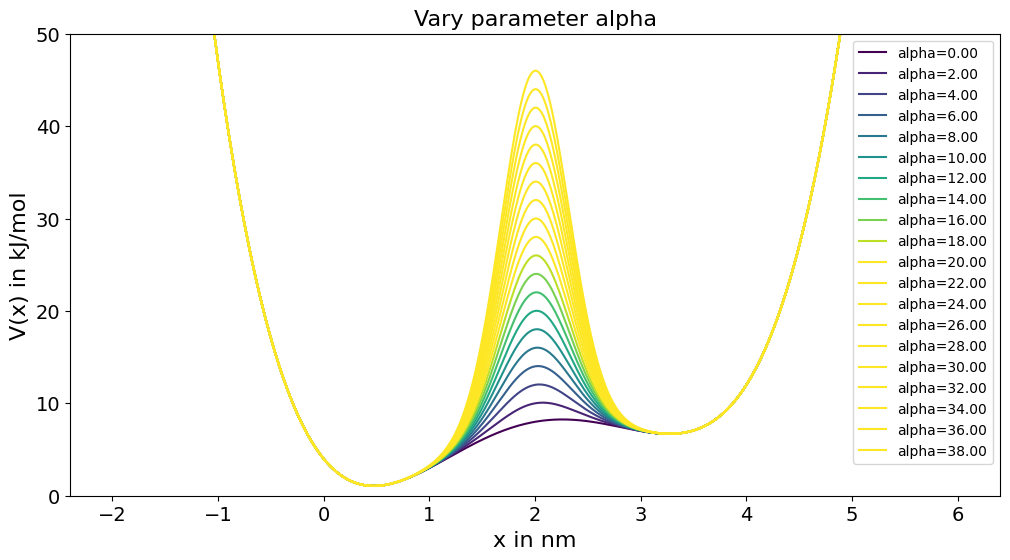

In [4]:
#-----------------------------------------
#   P O T E N T I A L 
#-----------------------------------------

# set parameters of one-dimensional Bolhuis potential
a = 2
b = 2
c = 5
k1 = 1
k2 = 2
alpha = 0
param = [a, b, c, k1, k2, alpha]

# initialize one-dimensional Bolhuis potential
potential = D1.Bolhuis(param)

# set x-axis
x = np.linspace(-2, 6, 501)

# set discretization interval, in case the analytical Hessian is not implemented
h = 0.001

#set list of alpha values
alpha_list = np.linspace(0, 38, 20)

print("-----------------------------------------------------------------------")
print(" Initialized 1-dimensional Bolhuis potential ")
print("-----------------------------------------------------------------------")
print("a: ", potential.a)
print("b: ", potential.b)
print("c: ", potential.c)
print("k1: ", potential.k1)
print("k2: ", potential.k2)
print("alpha: ", potential.alpha)


#----------------------------------------------
# plot potential for various values of alpha
plt.figure(figsize=(12, 6)) 
for i, alpha in enumerate(alpha_list):
    
    # change alpha in the class instance
    potential.alpha = alpha
    # plot
    color = plt.cm.viridis( alpha / len(alpha_list) )  # Normalize alpha to be in [0, 1]
    plt.plot(x, potential.potential(x) , color=color, label='alpha={:.2f}'.format(alpha))
    
plt.ylim(0,50)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.xlabel("x in nm", fontsize=16)
plt.ylabel("V(x) in kJ/mol", fontsize=16)
plt.title("Vary parameter alpha", fontsize=16)
plt.legend()

# reset alpha to zero
potential.alpha = 0


## Minima

Next, calculate the two minima of the double well using the method ``min`` provided by the potential class. This method finds the nearest minimum next to starting point $x_{\mathrm{start}}$. As starting points we use the mimima of the Bolhuis potential for $k_2 = 0$ and $\alpha=0$: 
$$
\begin{align}
    x_1 &= a - \sqrt{b} \cr
    x_2 &= a + \sqrt{b} \cr
\end{align}
$$


``alpha``is varied in the potential-object for the Bolhuis potenial that was created above, the positions of the two minima are calculated and printed to screen. Additionally, the force and the Hessian at these points are calculated using the methods ``force`` and ``hessian``provided by the potential class.

Note that 
- due to numerical inaccuracies, the force is not exactly zero at the minima.
- the location of the minima and the Hessian hardly changes when ``alpha`` is varied

In [5]:
#-----------------------------------------
#   M I N I M A 
#-----------------------------------------

# initizalize lists for the two minima
min_1 = np.zeros( len(alpha_list) )
min_2 = np.zeros( len(alpha_list) )


# caclulate start values
min_1_start = potential.a - np.sqrt( potential.b )
min_2_start = potential.a + np.sqrt( potential.b )

# initizalize lists for the forces in the two minima
force_min_1 = np.zeros( len(alpha_list) )
force_min_2 = np.zeros( len(alpha_list) )

# initizalize lists for the hessians in the two minima
hessian_min_1 = np.zeros( len(alpha_list) )
hessian_min_2 = np.zeros( len(alpha_list) )


# loop over alpha
for i, alpha in enumerate(alpha_list):
    
    # change alpha in the class instance
    potential.alpha = alpha

    # find minima 
    min_1[i] = potential.min(min_1_start)
    min_2[i] = potential.min(min_2_start)

    # calculate the forces in the minima
    force_min_1[i] = potential.force( min_1[i], h )        
    force_min_2[i] = potential.force( min_2[i], h ) 
    
    # calculate the hessians in the minima
    hessian_min_1[i] = potential.hessian( min_1[i], h )        
    hessian_min_2[i] = potential.hessian( min_2[i], h ) 

# reset alpha to zero
potential.alpha = 0

print("-----------------------------------------------------------------------")
print(" Minimum 1 from alpha = ", alpha_list[0], " to  alpha = ", alpha_list[-1])
print("-----------------------------------------------------------------------")
print("Minimum 1: position")
print(min_1)
print("")
print("Minimum 1: force")
print(force_min_1)
print("")
print("Minimum 1: hessian")
print(hessian_min_1)
print("")
print("-----------------------------------------------------------------------")
print(" Minimum 2 from alpha = ", alpha_list[0], " to  alpha = ", alpha_list[-1])
print("-----------------------------------------------------------------------")
print("Minimum 2: position")
print(min_2)
print("")
print("Minimum 2: force")
print(force_min_2)
print("")
print("Minimum 2: hessian")
print(hessian_min_2)


-----------------------------------------------------------------------
 Minimum 1 from alpha =  0.0  to  alpha =  38.0
-----------------------------------------------------------------------
Minimum 1: position
[0.47431293 0.47429943 0.47428594 0.47427245 0.47425897 0.4742455
 0.47423203 0.47421856 0.4742051  0.47419165 0.4741782  0.47416476
 0.47415132 0.47413789 0.47412447 0.47411105 0.47409763 0.47408422
 0.47407082 0.47405742]

Minimum 1: force
[-1.03095434e-06 -1.01083769e-06 -9.95352671e-07 -1.01656148e-06
 -9.69301801e-07 -9.70021318e-07 -9.49882644e-07 -9.41820004e-07
 -9.25471107e-07 -8.80651480e-07 -8.74132686e-07 -8.81725667e-07
 -8.61462181e-07 -8.17988617e-07 -8.24526375e-07 -8.12462054e-07
 -8.03612950e-07 -7.80677893e-07 -7.90623123e-07 -7.42097492e-07]

Minimum 1: hessian
[19.9326524  19.93707518 19.94149627 19.94591563 19.95033344 19.95474949
 19.95916392 19.96357665 19.96798773 19.9723972  19.97680494 19.98121099
 19.98561543 19.99001825 19.99441933 19.99881879 20.00

/var/folders/5w/v5vsnwn54m1357vwl33gfzxmqlcqg6/T/ipykernel_30784/2645996563.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  force_min_1[i] = potential.force( min_1[i], h )
/var/folders/5w/v5vsnwn54m1357vwl33gfzxmqlcqg6/T/ipykernel_30784/2645996563.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  force_min_2[i] = potential.force( min_2[i], h )
/var/folders/5w/v5vsnwn54m1357vwl33gfzxmqlcqg6/T/ipykernel_30784/2645996563.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated N

## Transition state

``alpha``is varied and for each value of ``alpha`` the location of the transition state is calcualted using the method ``TS`` provided by the potential class. This method needs the location of an initial and a final state as an input, for which we use the location of the two minima calculated in the previous step. Additionally, the force and the hessian at the transition state are calculated using the methods ``force`` and ``hessian`` provided by the potential class. Position of the transition state, force and hessian are printed to screen.

In [6]:
#-----------------------------------------
#   T R A N S I T I O N   S T A T E
#-----------------------------------------

# initizalize list for the transition state
TS = np.zeros( len(alpha_list) )

# initizalize list for the force at the transition state
force_TS = np.zeros( len(alpha_list) )

# initizalize list for the hessian at the transition state
hessian_TS = np.zeros( len(alpha_list) )

# loop over alpha
for i, alpha in enumerate(alpha_list):
    
    # change alpha in the class instance
    potential.alpha = alpha
    
    # calculate transition state
    TS[i] = potential.TS( min_1[i], min_2[i])
    
    # calculate force at the transition state
    force_TS[i] = potential.force( TS[i], h )

    # calculate hessian at the transition state
    hessian_TS[i] = potential.hessian( TS[i], h )

# reset alpha to zero
potential.alpha = 0    
   
# print position and force of the transition state
print("")
print("-----------------------------------------------------------------------")
print(" Transition state from alpha = ", alpha_list[0], " to  alpha = ", alpha_list[-1])
print("-----------------------------------------------------------------------")
print("TS: position")
print(TS)
print("")
print("TS: force")
print(force_TS)
print("")
print("TS: hessian")
print(hessian_TS)


-----------------------------------------------------------------------
 Transition state from alpha =  0.0  to  alpha =  38.0
-----------------------------------------------------------------------
TS: position
[2.25865201 2.07284621 2.04197972 2.02952659 2.02278147 2.01854826
 2.01564303 2.01352526 2.01191284 2.01064408 2.00961967 2.00877517
 2.00806706 2.0074647  2.00694605 2.00649484 2.00609866 2.00574804
 2.00543554 2.0051553 ]

TS: force
[-8.35869320e-08 -3.35519087e-07 -7.46556844e-07 -3.31618803e-07
 -1.14248248e-06 -1.31898091e-06 -3.36085429e-06 -2.00771893e-06
 -1.31122271e-06 -3.49148424e-06 -1.49494800e-06 -7.71162077e-06
 -2.14753199e-06 -2.63606479e-06 -9.28554346e-06 -2.62157648e-06
 -2.54651036e-06 -4.69279817e-06 -1.11730311e-05 -5.12674549e-06]

TS: hessian
[  -7.19718965  -26.37911742  -46.92920695  -67.20774486  -87.37232272
 -107.48055377 -127.55704474 -147.6139387  -167.65790041 -187.69288463
 -207.72138222 -227.74504572 -247.76500399 -267.78206696 -287.79682204

/var/folders/5w/v5vsnwn54m1357vwl33gfzxmqlcqg6/T/ipykernel_30784/578312821.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  force_TS[i] = potential.force( TS[i], h )
/var/folders/5w/v5vsnwn54m1357vwl33gfzxmqlcqg6/T/ipykernel_30784/578312821.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hessian_TS[i] = potential.hessian( TS[i], h )


## Eyring Transition State Theory
The rate constants using Eyring TST and the high-temperature approximation to Eyring TST can be calculated by functions ``TST_D1``and ``TST_ht_D1`` provided by the module ``utils/rate_theory``. The two functions take as input
- location of the minimum of the reactant state, which we calculated above
- location of the transition state, which we calculated above
- temperature, which we take from our instance of the system class
- mass, which we take from our instance of the system class
- potential, for which we use our instance of the potential class

``alpha`` is varied, rates are printed to screen and plotted as a function of ``alpha``.


-----------------------------------------------------------------------
 TST rate
-----------------------------------------------------------------------
k_AB
[3.96570452e-03 1.91357086e-03 8.68856295e-04 3.91675003e-04
 1.76165957e-04 7.91560111e-05 3.55480416e-05 1.59591883e-05
 7.16338229e-06 3.21488701e-06 1.44268260e-06 6.47358058e-07
 2.90465516e-07 1.30324532e-07 5.84713568e-08 2.62330275e-08
 1.17691215e-08 5.27997324e-09 2.36871457e-09 1.06264476e-09]
k_BA
[2.85299207e-02 1.38414498e-02 6.31800849e-03 2.86282579e-03
 1.29411315e-03 5.84335615e-04 2.63676701e-04 1.18931305e-04
 5.36273858e-05 2.41753530e-05 1.08961863e-05 4.91025761e-06
 2.21243906e-06 9.96741396e-07 4.48996651e-07 2.02235479e-07
 9.10811849e-08 4.10166279e-08 1.84694365e-08 8.31595000e-09]
k_AB, ht
[3.96568317e-03 1.91356056e-03 8.68851615e-04 3.91672893e-04
 1.76165008e-04 7.91555845e-05 3.55478500e-05 1.59591022e-05
 7.16334366e-06 3.21486966e-06 1.44267482e-06 6.47354564e-07
 2.90463948e-07 1.30323828e-07 

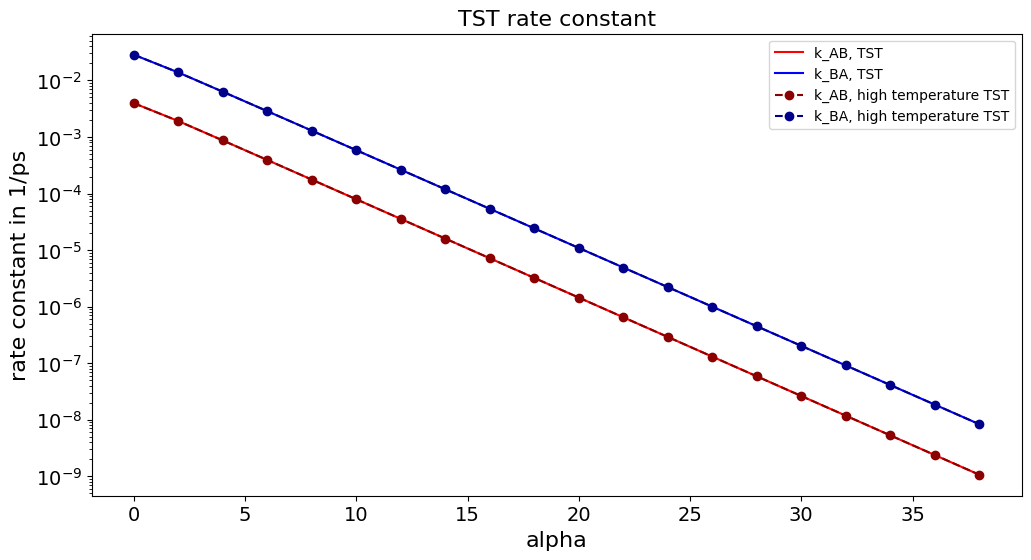

In [7]:
#-----------------------------------------
#   T S T  R A T E
#-----------------------------------------

# initizalize list of TST rates
k_AB = np.zeros( len(alpha_list) )
k_BA = np.zeros( len(alpha_list) )
k_AB_ht = np.zeros( len(alpha_list) )
k_BA_ht = np.zeros( len(alpha_list) )

# loop over alpha
for i, alpha in enumerate(alpha_list):

    # set alpha value in the potential
    potential.alpha = alpha_list[i]
    
    # calculate the Eyring TST rates
    k_AB[i] = rate_theory.TST_D1(min_1[i], TS[i], system.T, system.m, h, potential)
    k_BA[i] = rate_theory.TST_D1(min_2[i], TS[i], system.T, system.m, h, potential)

    # calculate the high-temperature approximation of the Eyring TST rates
    k_AB_ht[i] = rate_theory.TST_ht_D1(min_1[i], TS[i], system.T, system.m, h, potential)
    k_BA_ht[i] = rate_theory.TST_ht_D1(min_2[i], TS[i], system.T, system.m, h, potential)


#----------------------------------------------
# plot TST rate as a function of alpha
plt.figure(figsize=(12, 6)) 
    
plt.semilogy(alpha_list, k_AB, color="red", label='k_AB, TST')
plt.semilogy(alpha_list, k_BA, color="blue", label='k_BA, TST')
plt.semilogy(alpha_list, k_AB_ht, color="darkred", marker='o', linestyle='dashed', label='k_AB, high temperature TST')
plt.semilogy(alpha_list, k_BA_ht, color="darkblue", marker='o', linestyle='dashed', label='k_BA, high temperature TST')

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)    
plt.xlabel("alpha", fontsize=16)
plt.ylabel("rate constant in 1/ps", fontsize=16) 
plt.title("TST rate constant", fontsize=16)
plt.legend()


print("")
print("-----------------------------------------------------------------------")
print(" TST rate")
print("-----------------------------------------------------------------------")
print("k_AB")
print(k_AB)
print("k_BA")
print(k_BA)
print("k_AB, ht")
print(k_AB_ht)
print("k_BA, ht")
print(k_BA_ht)